<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

In [2]:
# Insérez votre code ici
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import torch

period0 = pd.read_csv("period_0.csv")

period0


,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67
...,...,...,...,...,...,...,...,...,...,...
995,27,0,6,9,0.67,"Clothing,Shoes & Jewelry",86.664343,1,1,46.65
996,30,0,4,7,0.40,"Health, Household & Baby Care",365.542532,2,2,85.94
997,30,0,5,5,0.46,Beauty & Personal Care,252.582605,0,0,71.69
998,23,0,1,8,0.66,Toys & Games,3.329596,0,0,15.69


On peut voir que l'on a une variable catégorielle qui est "TopCategory", nous allons donc l'encoder afin de pouvoir appliquer nos modèles


In [5]:
# On affiche quelques informations sur les données catégorielles de la période 0 
cat_cols = [col for col in period0.columns if period0[col].dtype == 'object']
print(cat_cols)
# Encoder les colonnes catégorielles en utilisant la méthode get_dummies()
period0 = pd.get_dummies(period0, columns=cat_cols)

# informations sur nos données
period0.info()
period0.describe()

[]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        1000 non-null   int64  
 1   Seniority                                  1000 non-null   int64  
 2   Orders                                     1000 non-null   int64  
 3   Items                                      1000 non-null   int64  
 4   AverageDiscount                            1000 non-null   float64
 5   BrowsingTime                               1000 non-null   float64
 6   EmailsOpened                               1000 non-null   int64  
 7   SupportInteractions                        1000 non-null   int64  
 8   TotalCart                                  1000 non-null   float64
 9   TopCategory_Beauty & Personal Care         1000 non-null   uint8  
 10  TopCategory_Clothing,S

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart,TopCategory_Beauty & Personal Care,"TopCategory_Clothing,Shoes & Jewelry",TopCategory_Electronics,"TopCategory_Health, Household & Baby Care",TopCategory_Home & Kitchen,TopCategory_Office Supplies,TopCategory_Pet Supplies,TopCategory_Sports & outdoors,TopCategory_Toys & Games
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.06900,0.508000,3.011000,5.975000,0.371700,97.949068,0.989000,1.012000,35.884260,0.259000,0.227000,0.049000,0.099000,0.167000,0.003000,0.009000,0.016000,0.171000
std,5.05943,0.720038,1.731438,2.399194,0.219133,100.222845,1.002938,1.022204,17.619171,0.438305,0.419102,0.215976,0.298811,0.373162,0.054717,0.094488,0.125538,0.376697
min,7.00000,0.000000,0.000000,1.000000,0.000000,0.012724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.00000,0.000000,2.000000,4.000000,0.180000,29.333357,0.000000,0.000000,25.575000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.00000,0.000000,3.000000,6.000000,0.380000,68.037177,1.000000,1.000000,33.655000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.00000,1.000000,4.000000,7.000000,0.560000,127.063901,2.000000,2.000000,43.772500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.00000,4.000000,9.000000,15.000000,0.750000,831.026761,5.000000,7.000000,138.880000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# On regarde si quelques données sont manquantes
print(period0.isnull().sum())

Age                                          0
Seniority                                    0
Orders                                       0
Items                                        0
AverageDiscount                              0
BrowsingTime                                 0
EmailsOpened                                 0
SupportInteractions                          0
TotalCart                                    0
TopCategory_Beauty & Personal Care           0
TopCategory_Clothing,Shoes & Jewelry         0
TopCategory_Electronics                      0
TopCategory_Health, Household & Baby Care    0
TopCategory_Home & Kitchen                   0
TopCategory_Office Supplies                  0
TopCategory_Pet Supplies                     0
TopCategory_Sports & outdoors                0
TopCategory_Toys & Games                     0
dtype: int64


* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

Avant d'appliquer nos momdèles, nous allons, dans un premier temps, séparer nos nos données de la période 0 en données d'entrainement, de test et de validation.

In [7]:
from sklearn.model_selection import train_test_split

y=period0["TotalCart"]
X=period0.drop(columns=["TotalCart"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


# I. Modèles



A ) Régression linéaire

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# normalisation des données et utilisation d'une PCA pour réduire le nombre de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Créer un modèle de régression linéaire
model = LinearRegression()

model.fit(X_train_scaled, y_train)

# prédictions
y_pred = model.predict(X_test_scaled)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)


# Afficher les résultats
print("MSE :", mse)


MSE : 18.344561064933178


B ) RandomForest

In [33]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=60, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled , y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)


# Afficher les résultats
print("MSE :", mse)


MSE : 4.737876970833337


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle XGBoost
model = xgb.XGBRegressor()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

# Afficher le MSE
print("MSE :", mse)

MSE : 2.565659905850124


C ) XGBoost

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle XGBoost
model = xgb.XGBRegressor()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

# Afficher le MSE
print("MSE :", mse)

MSE : 2.565659905850124


# II. Hyperparamétrisation

Le modèle le plus performant est ici le modèle XGBoost, nous allons mener une hyperparamétrisation sur ce modèle afin de voir si la performance peut être encore plus améliorée. Pour utiliser au mieux l'hyperparamétrisation, je vais utiliser Optuna ( j'ai eu l'occasion de l'utiliser cette année sur deux projets de recherche interne à l'Ecole ).

In [12]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.3 MB/s eta 0:00:00


In [37]:
import xgboost as xgb
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Fonction objectif pour Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.01, 1.0),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Création d'un étude Optuna
model_study = optuna.create_study(direction='minimize')
model_study.optimize(objective, n_trials=100)

# Meilleurs paramètres trouvés par Optuna
parameters = model_study.best_trial.params

# Entraînement final du modèle avec les meilleurs paramètres
best_model_xgb = xgb.XGBRegressor(**parameters)
best_model_xgb.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test avec le modèle final
y_pred_final = best_model_xgb.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE) avec le modèle final
mse_best_model = mean_squared_error(y_test, y_pred_final)

# Afficher le MSE avec le modèle final
print("MSE avec le modèle final :", mse_best_model)

[I 2023-06-04 15:31:30,840] A new study created in memory with name: no-name-ba867f51-bbd9-450c-9495-b598c7354f4c
<ipython-input-37-0874911a3376>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-37-0874911a3376>:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-37-0874911a3376>:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0

MSE avec le modèle final : 0.4063564020004107


Finalement, nous obtenons une MSE de l'ordre de 0.40, ce qui est clairement plus performant que les résultats précedents.

In [38]:
# Validation du modèle avec les donénes de validation : 

X_val_scaled = scaler.transform(X_val)

y_pred_val = best_model_xgb.predict(X_val_scaled)

mse_val = mean_squared_error(y_val, y_pred_val)

print("MSE avec le modèle final :", mse_val)

MSE avec le modèle final : 0.45925547300749014


# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [39]:

P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
  kl = np.sum(P * np.log(P/Q))
  return  kl

def JSDivergence(P, Q):
    M = 0.5 * (P + Q)
    js =  0.5 * KLDivergence(P,M) + 0.5 * KLDivergence(Q,M)
    return js
    

* Lancer la cellule suivante pour tester votre fonction.

In [40]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [41]:
def WassersteinDistance(X, Y, p):
    X_ = np.sort(X)
    Y_ = np.sort(Y)
    n=len(X)
    w = np.power(np.sum(np.power(np.abs(X_ - Y_), p)) / n, 1/p)
    return w
    

* Lancer la cellule suivante pour tester votre fonction.

In [42]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.06642404046392301

# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

Dans un premier temps, nous allons importer les données des différentes périodes en les normalisant comme conseillé par rapport aux moyennes et variances de la période 0

In [56]:
period0=pd.read_csv("period_0.csv")
period1=pd.read_csv("period_1.csv")
period2=pd.read_csv("period_2.csv")
period3=pd.read_csv("period_3.csv")


mean_period0 = period0.mean()
std_period0 = period0.std()

y0 = period0['TotalCart']
y1 = period1['TotalCart']
y2 = period2['TotalCart']
y3 = period3['TotalCart']

X0 = period0.drop(columns=['TotalCart'])
X1 = period1.drop(columns=['TotalCart'])
X2 = period2.drop(columns=['TotalCart'])
X3 = period3.drop(columns=['TotalCart'])


<ipython-input-56-8f5ab560669c>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_period0 = period0.mean()
<ipython-input-56-8f5ab560669c>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_period0 = period0.std()


In [57]:
X0_normalized = (X0 - mean_period0) / std_period0
X1_normalized = (X1 - mean_period0) / std_period0
X2_normalized = (X2 - mean_period0) / std_period0
X3_normalized = (X3 - mean_period0) / std_period0

A ) Dérive des données

In [58]:
p = 2  
wasserstein_distances = {}
for column in X0.columns:
  if column == 'TopCategory':
    pass
  else:
    dist01 = WassersteinDistance(X0_normalized[column], X1_normalized[column], p)
    dist12 = WassersteinDistance(X1_normalized[column], X2_normalized[column], p)
    dist23 = WassersteinDistance(X2_normalized[column], X3_normalized[column], p)
    wasserstein_distances[column] = [dist01, dist12, dist23]

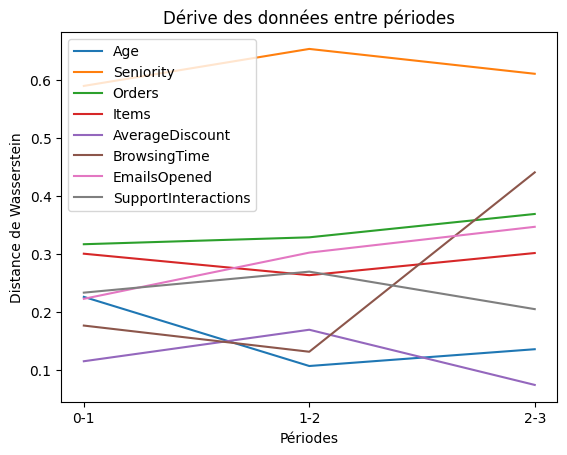

In [59]:
import matplotlib.pyplot as plt

periods = ['0-1', '1-2', '2-3']

for feature, distances in wasserstein_distances.items():
    plt.plot(periods, distances, label=feature)

plt.xlabel('Périodes')
plt.ylabel('Distance de Wasserstein')
plt.title('Dérive des données entre périodes')
plt.legend()
plt.show()

In [60]:
X0_categorical = X0["TopCategory"]
X1_categorical = X1["TopCategory"]
X2_categorical = X2["TopCategory"]
X3_categorical = X3["TopCategory"]

# Calcul des distributions des catégories pour chaque période
distribution_period0 = pd.value_counts(X0_categorical) / len(X0_categorical)
distribution_period1 = pd.value_counts(X1_categorical) / len(X1_categorical)
distribution_period2 = pd.value_counts(X2_categorical) / len(X2_categorical)
distribution_period3 = pd.value_counts(X3_categorical) / len(X3_categorical)


# Calcul des divergences de Jensen-Shannon entre les distributions des catégories pour chaque paire de périodes
js_divergence_01 = JSDivergence(distribution_period0.values, distribution_period1.values)
js_divergence_02 = JSDivergence(distribution_period0.values, distribution_period2.values)
js_divergence_03 = JSDivergence(distribution_period0.values, distribution_period3.values)

# Affichage des divergences de Jensen-Shannon
print("Divergence entre période 0 et période 1:", js_divergence_01)
print("Divergence entre période 0 et période 2:", js_divergence_02)
print("Divergence entre période 0 et période 3:", js_divergence_03)



Divergence entre période 0 et période 1: 0.003552646559133209
Divergence entre période 0 et période 2: 0.004471319072689976
Divergence entre période 0 et période 3: 0.004925821238339105


Dérive du modèle

In [61]:
from scipy.stats import wasserstein_distance

# traitement données catégorielles
cat_cols = [col for col in X0.columns if X0[col].dtype == 'object']
X0 = pd.get_dummies(X0, columns=cat_cols)

cat_cols = [col for col in X1.columns if X1[col].dtype == 'object']
X1 = pd.get_dummies(X1, columns=cat_cols)

cat_cols = [col for col in X2.columns if X2[col].dtype == 'object']
X2 = pd.get_dummies(X2, columns=cat_cols)

cat_cols = [col for col in X3.columns if X3[col].dtype == 'object']
X3 = pd.get_dummies(X3, columns=cat_cols)

#Standardisation des données
scaler = StandardScaler()
X0= scaler.fit_transform(X1)
X1= scaler.fit_transform(X1)
X2= scaler.fit_transform(X1)
X3= scaler.fit_transform(X1)

# Prédictions du modèle pour chaque période
y_pred_0 = best_model_xgb.predict(X1)
y_pred_1 = best_model_xgb.predict(X1)
y_pred_2 = best_model_xgb.predict(X2)
y_pred_3 = best_model_xgb.predict(X3)

# Distances de Wasserstein entre les distributions des prédictions et des valeurs réelles pour chaque période
wasserstein_distance_period0 = wasserstein_distance(y_pred_0, y0)
wasserstein_distance_period1 = wasserstein_distance(y_pred_1, y1)
wasserstein_distance_period2 = wasserstein_distance(y_pred_2, y2)
wasserstein_distance_period3 = wasserstein_distance(y_pred_3, y3)

# Affichage des distances de Wasserstein pour chaque période
print("Distance de Wasserstein pour la période 1 :", wasserstein_distance_period0)
print("Distance de Wasserstein pour la période 1 :", wasserstein_distance_period1)
print("Distance de Wasserstein pour la période 2 :", wasserstein_distance_period2)
print("Distance de Wasserstein pour la période 3 :", wasserstein_distance_period3)

Distance de Wasserstein pour la période 1 : 1.1514648454884444
Distance de Wasserstein pour la période 1 : 5.625225828774347
Distance de Wasserstein pour la période 2 : 6.746535258705988
Distance de Wasserstein pour la période 3 : 10.635656817543879


CONCLUSION : 

On peut voir que d'après les résultats obtenus précédemmen: 
- la variable BrowSing Time semble avoir une distance de Wasserstein qui croit brusquement. On peut en déduire l'existence d'une dérive importante au fil du temps, ce qui peut sensiblement impacté la performance du modèle
- Certaines variables ont une dérive moyenne qui ne varie pas de manière significative pour impacter réellement notre modèle

- Sur le modèle, on peut remarquer l'existence d'une forte dérive au sens de Wasserstein. On peut donc en déduire que l'on doit prendre en compte ce fait dans la mise en production de notre modèle. En effet, il sera sans doute plus pertinent de revoir le modèle pour qu'il reste performant dans un plus long terme.